# Tests of WMRB
Try out Weighted Margin Batch Loss to see if I understand it

In [1]:
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib import collections, lines, markers, path, patches
%matplotlib inline

In [2]:
from optimiser import *

## Sphere test
Start with one positive and one negative example, and a fixed user vector.

In [3]:
alpha = 0.1
beta = 1.1
a = np.array([np.cos(alpha), np.sin(alpha)])
b = np.array([np.cos(beta), np.sin(beta)])
positives = [a]
negatives = [b]
users = [np.array([np.cos(2.5), np.sin(2.5)]), -np.array([np.cos(2.5), np.sin(2.5)])]

In [4]:
updated_pts = [positives[0]]
for i in range(1,10):
    updated_pts.append(
        gradient_descent(updated_pts[i-1], 
                         users[0], 
                         error_differential_eucl, 
                         geometry="spherical", 
                         learning_rate=0.2
                        )

    )
print(updated_pts)

u = [0.99500417 0.09983342], v = [-0.80114362  0.59847214], u.v = -0.7373937155412454
project_to_tangent: point_on_manifold = [0.99500417 0.09983342], displacement = [ 1.18606556 -0.88601742], geometry = spherical
u = [0.95533649 0.29552021], v = [-0.80114362  0.59847214], u.v = -0.5885011172792847
project_to_tangent: point_on_manifold = [0.95533649 0.29552021], displacement = [ 0.9909056  -0.74022858], geometry = spherical
u = [0.87758256 0.47942554], v = [-0.80114362  0.59847214], u.v = -0.41614683659655954
project_to_tangent: point_on_manifold = [0.87758256 0.47942554], displacement = [ 0.88105783 -0.65816984], geometry = spherical
u = [0.76484219 0.64421769], v = [-0.80114362  0.59847214], u.v = -0.22720209476743208
project_to_tangent: point_on_manifold = [0.76484219 0.64421769], displacement = [ 0.82265807 -0.61454392], geometry = spherical
u = [0.62160997 0.78332691], v = [-0.80114362  0.59847214], u.v = -0.029199522398126232
project_to_tangent: point_on_manifold = [0.62160997 0.

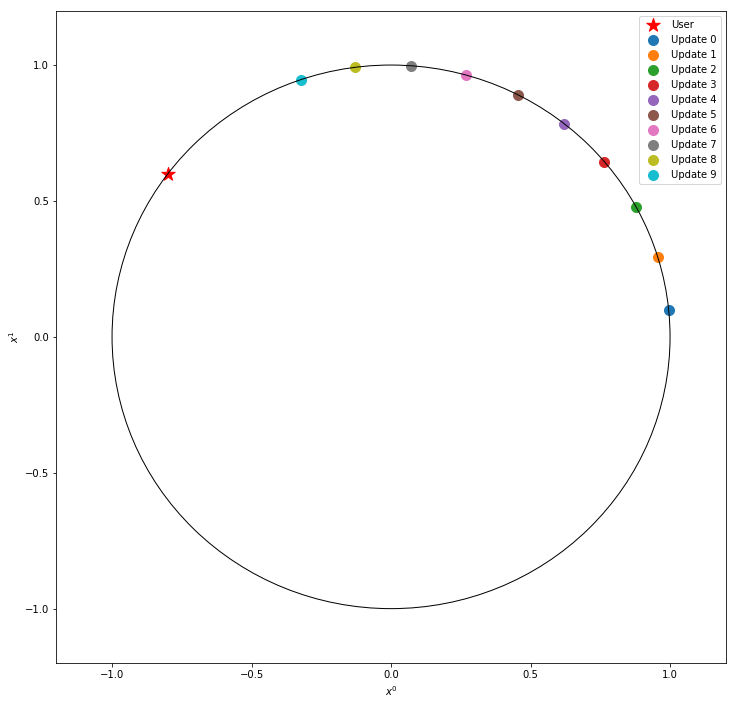

In [5]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(users[0][0], users[0][1], color='r', marker='*',s=200,label = "User")
for i, pt in enumerate(updated_pts):
    ax.scatter(
                pt[0], pt[1], 
                marker=markers.MarkerStyle('o',fillstyle="none"), 
                s=100, label="Update {}".format(i)
              )
ax.legend()

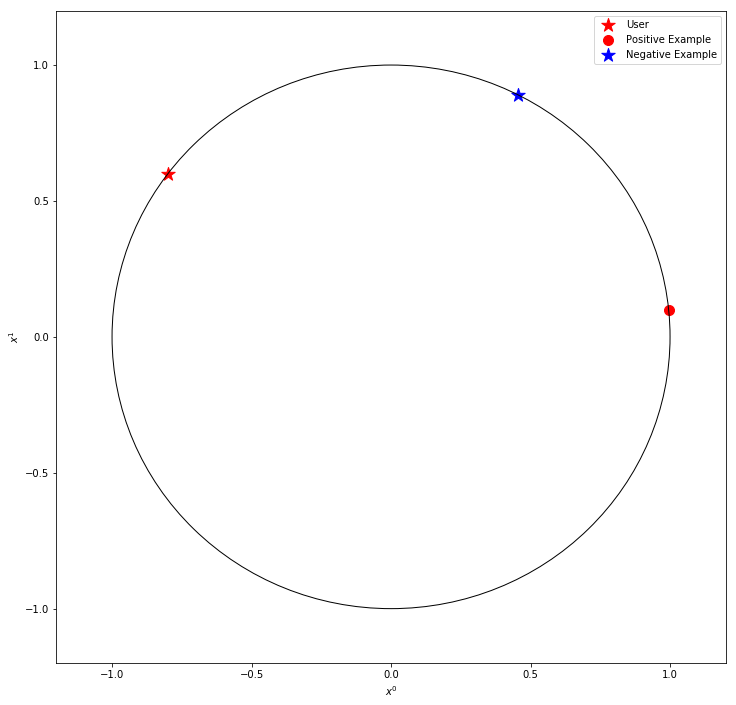

In [6]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(users[0][0], users[0][1], color='r', marker='*',s=200,label = "User")
pos_scat = ax.scatter([], [], color='r', marker = 'o', s = 100, label = "Positive Example")
ax.scatter(negatives[0][0], negatives[0][1], color='b', marker='*',s=200,label = "Negative Example")
ax.legend()
#fig.canvas.draw()
bg_cache = fig.canvas.copy_from_bbox(ax.bbox)

def plot_point(num):
    pos_scat.set_offsets(updated_pts[num])
    return pos_scat
#    return updated_pts[num]

anim = animation.FuncAnimation(fig,
                               plot_point,
                   #            gradient_descent(
                   #                              updated_pts[i-1], 
                   #                              users[0], 
                   #                              error_differential_eucl, 
                    #                             geometry="spherical", 
                   #                              learning_rate=0.2
                    #            ),
                               frames=len(updated_pts),
                               blit=False,
                              )
anim.save('circle.mp4')

## Multiple examples
Now have multiple positive and negative examples

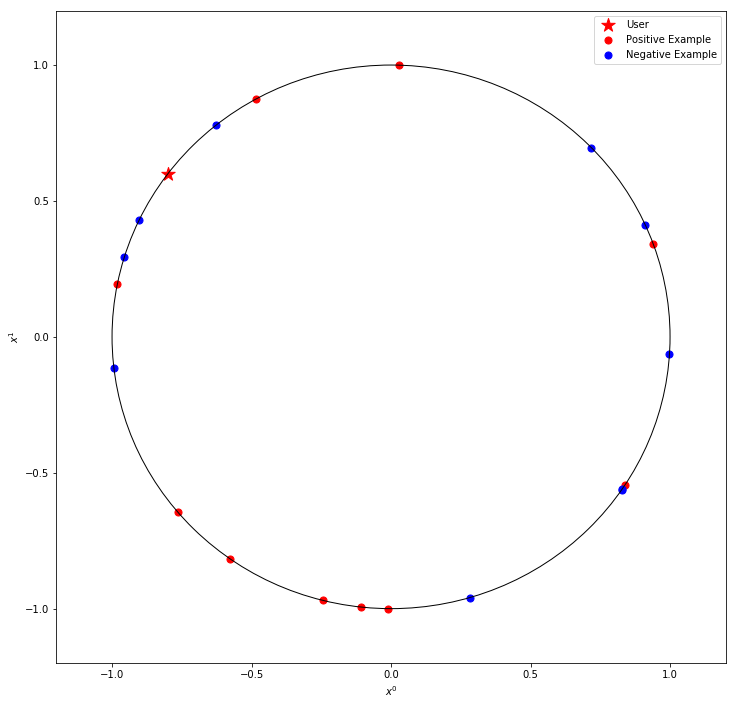

In [7]:
np.random.seed(121)
pos_angle = np.random.uniform(-np.pi, np.pi,10)
neg_angle = np.random.uniform(-np.pi, np.pi,10)
positives = np.cos(pos_angle)
positives = np.array([np.array([np.cos(angle), np.sin(angle)]) for angle in pos_angle])
negatives = np.array([np.array([np.cos(angle), np.sin(angle)]) for angle in neg_angle])

fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(users[0][0], users[0][1], color='r', marker='*',s=200,label = "User")
ax.scatter(positives[:,0], positives[:,1], color='r', marker='.',s=200,label = "Positive Example")
ax.scatter(negatives[:,0], negatives[:,1], color='b', marker='.',s=200,label = "Negative Example")
ax.legend()


u = [-0.76515633 -0.64384454], v = [-0.80114362  0.59847214], u.v = 0.2276770883563824
project_to_tangent: point_on_manifold = [-0.76515633 -0.64384454], displacement = [ 0.8227518  -0.61461394], geometry = spherical
u = [-0.24401572 -0.96977128], v = [-0.80114362  0.59847214], u.v = -0.38488946121788103
project_to_tangent: point_on_manifold = [-0.24401572 -0.96977128], displacement = [ 0.86801301 -0.64842508], geometry = spherical
u = [-0.1068455  -0.99427563], v = [-0.80114362  0.59847214], u.v = -0.5094476770291804
project_to_tangent: point_on_manifold = [-0.1068455  -0.99427563], displacement = [ 0.93101928 -0.69549216], geometry = spherical
u = [-0.57785705 -0.816138  ], v = [-0.80114362  0.59847214], u.v = -0.025489375315819518
project_to_tangent: point_on_manifold = [-0.57785705 -0.816138  ], displacement = [ 0.801404   -0.59866665], geometry = spherical
u = [-0.4827342   0.87576692], v = [-0.80114362  0.59847214], u.v = 0.9108615271512693
project_to_tangent: point_on_manifold =

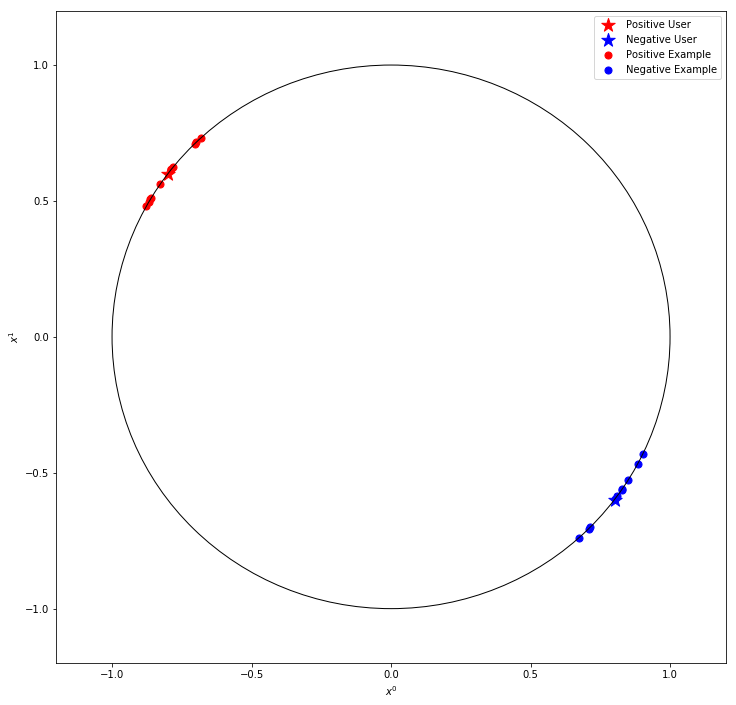

In [8]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)

ax.scatter(users[0][0], users[0][1], color='r', marker='*',s=200,label = "Positive User")
ax.scatter(users[1][0], users[1][1], color='b', marker='*',s=200,label = "Negative User")
pos_scat = ax.scatter([], [], color='r', marker='.',s=200,label = "Positive Example")
neg_scat = ax.scatter([], [], color='b', marker='.',s=200,label = "Negative Example")
ax.legend()

bg_cache = fig.canvas.copy_from_bbox(ax.bbox)
pos_pts = positives
neg_pts = negatives
def plot_points(num):
    for i, pt in enumerate(pos_pts):
        pos_pts[i] = gradient_descent(
                                             pt, 
                                             users[0], 
                                             error_differential_eucl, 
                                             geometry="spherical", 
                                             learning_rate=0.2
                            )
    pos_scat.set_offsets(pos_pts)
    for i, pt in enumerate(neg_pts):
        neg_pts[i] = gradient_descent(
                                             pt, 
                                             users[1], 
                                             error_differential_eucl, 
                                             geometry="spherical", 
                                             learning_rate=0.2
                            )
    neg_scat.set_offsets(neg_pts)
    return pos_scat, neg_scat
#    return updated_pts[num]

anim = animation.FuncAnimation(fig,
                               plot_points,
                   #            gradient_descent(
                   #                              updated_pts[i-1], 
                   #                              users[0], 
                   #                              error_differential_eucl, 
                    #                             geometry="spherical", 
                   #                              learning_rate=0.2
                    #            ),
                           #    fargs=[updated_pts],
                               frames=20,
                               blit=False,
                              )
anim.save('circle_many.mp4')

## Now try with users that are the sum of the products

project_to_tangent: point_on_manifold = [ 0.98163203 -0.19078409], displacement = [99.02897056 11.07230648], geometry = spherical
project_to_tangent: point_on_manifold = [-0.95794332  0.28695747], displacement = [-27.48248038   5.46872563], geometry = spherical
project_to_tangent: point_on_manifold = [-0.41916327  0.90791087], displacement = [ 5.88245081 21.3667503 ], geometry = spherical
project_to_tangent: point_on_manifold = [0.95676087 0.29087564], displacement = [136.21324618  56.4326088 ], geometry = spherical
project_to_tangent: point_on_manifold = [-0.31517132  0.94903479], displacement = [-17.62894879  57.33855796], geometry = spherical
project_to_tangent: point_on_manifold = [-0.68145708  0.73185808], displacement = [-16.52724273  44.00428143], geometry = spherical
project_to_tangent: point_on_manifold = [-0.19065072  0.98165794], displacement = [-2.26828393 32.22597728], geometry = spherical
project_to_tangent: point_on_manifold = [-0.99214036  0.12512994], displacement = [1

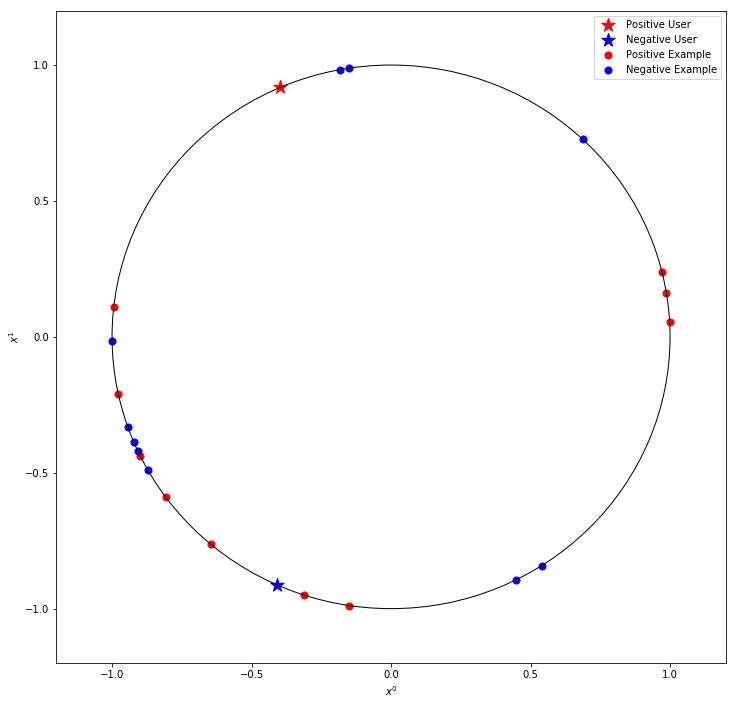

In [14]:
np.random.seed(1221)
user_angle = np.random.uniform(-np.pi, np.pi,2)
pos_angle = np.random.uniform(-np.pi, np.pi,10)
neg_angle = np.random.uniform(-np.pi, np.pi,10)
users = np.array([np.array([np.cos(angle), np.sin(angle)]) for angle in user_angle])
positives = np.array([np.array([np.cos(angle), np.sin(angle)]) for angle in pos_angle])
negatives = np.array([np.array([np.cos(angle), np.sin(angle)]) for angle in neg_angle])
items = [positives, negatives]

for i in range(2):
    for j in range(4):
        users[i] = gradient_descent(
                             users[i], 
                             items[i], 
                             frechet_diff, 
                             geometry="spherical", 
                             learning_rate=0.32,
                             return_vectors=False,
                        )

fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
ax.scatter(users[0][0], users[0][1], color='r', marker='*',s=200,label = "Positive User")
ax.scatter(users[1][0], users[1][1], color='b', marker='*',s=200,label = "Negative User")
ax.scatter(positives[:,0], positives[:,1], color='r', marker='.',s=200,label = "Positive Example")
ax.scatter(negatives[:,0], negatives[:,1], color='b', marker='.',s=200,label = "Negative Example")
ax.legend()


u = [-0.31035358 -0.95062119], v = [-0.3974021   0.91764458], u.v = -0.7489972172891791
project_to_tangent: point_on_manifold = [-0.31035358 -0.95062119], displacement = [ 0.59978601 -1.38497099], geometry = spherical
u = [-0.99395486  0.10978954], v = [-0.3974021   0.91764458], u.v = 0.49574752207203804
project_to_tangent: point_on_manifold = [-0.99395486  0.10978954], displacement = [ 0.45759049 -1.0566261 ], geometry = spherical
u = [-0.89834175 -0.43929729], v = [-0.3974021   0.91764458], u.v = -0.04611587498572717
project_to_tangent: point_on_manifold = [-0.89834175 -0.43929729], displacement = [ 0.39782535 -0.9186219 ], geometry = spherical
u = [0.99845679 0.05553404], v = [-0.3974021   0.91764458], u.v = -0.345828312826878
project_to_tangent: point_on_manifold = [0.99845679 0.05553404], displacement = [ 0.42353515 -0.97798862], geometry = spherical
u = [0.9707366  0.24014674], v = [-0.3974021   0.91764458], u.v = -0.16540341061759423
project_to_tangent: point_on_manifold = [0.97

/Users/wardropes/Work/ASOS/GeometryTests/geometry.py:81: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(dotprod)
/Users/wardropes/Work/ASOS/GeometryTests/optimiser.py:88: RuntimeWarning: invalid value encountered in sqrt
  coeff /= np.sqrt(1.-dot(p_eval, xi, geometry)**2)+ 1.e-10


u = [-0.58593039  0.81036139], v = [-0.67973152  0.73346101], u.v = 0.9926438393956767
project_to_tangent: point_on_manifold = [-0.58593039  0.81036139], displacement = [ 5.6143175  -6.05810215], geometry = spherical
u = [-0.75859221  0.65152317], v = [-0.67973152  0.73346101], u.v = 0.9935058863971085
project_to_tangent: point_on_manifold = [-0.75859221  0.65152317], displacement = [ 5.97404801 -6.44626762], geometry = spherical
u = [-0.58559397  0.81060453], v = [-0.67973152  0.73346101], u.v = 0.992593500080343
project_to_tangent: point_on_manifold = [-0.58559397  0.81060453], displacement = [ 5.59527639 -6.03755594], geometry = spherical
u = [-0.63249201  0.77456688], v = [-0.67973152  0.73346101], u.v = 0.9980393681657491
project_to_tangent: point_on_manifold = [-0.63249201  0.77456688], displacement = [ 10.86018853 -11.71863392], geometry = spherical
u = [-0.76543731  0.64351048], v = [-0.67973152  0.73346101], u.v = 0.9922817128510586
project_to_tangent: point_on_manifold = [-0.

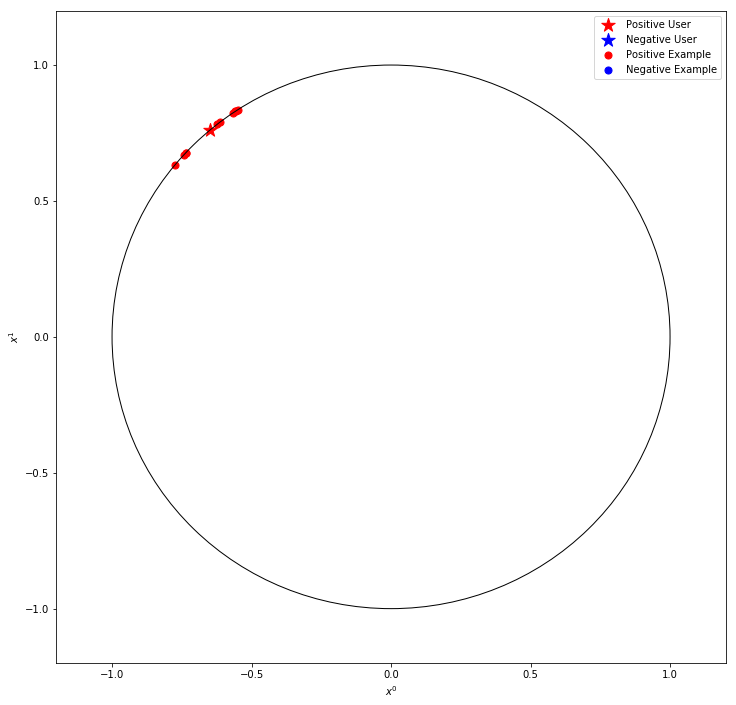

In [15]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
pos_user = ax.scatter([],[], color='r', marker='*',s=200,label = "Positive User")
neg_user = ax.scatter([],[], color='b', marker='*',s=200,label = "Negative User")
pos_scat = ax.scatter([], [], color='r', marker='.',s=200,label = "Positive Example")
neg_scat = ax.scatter([], [], color='b', marker='.',s=200,label = "Negative Example")
ax.legend()

bg_cache = fig.canvas.copy_from_bbox(ax.bbox)
pos_pts = positives
neg_pts = negatives
def plot_points(num):
    for i, pt in enumerate(pos_pts):
        pos_pts[i] = gradient_descent(
                                             pt, 
                                             users[0], 
                                             error_differential_eucl, 
                                             geometry="spherical", 
                                             learning_rate=0.2
                            )
    pos_scat.set_offsets(pos_pts)
    for j in range(2):
        users[0] = gradient_descent(
                             users[0], 
                             pos_pts, 
                             frechet_diff, 
                             geometry="spherical", 
                             learning_rate=0.05,
                             return_vectors=False,
                        ) 
    pos_user.set_offsets(users[0])

    for i, pt in enumerate(neg_pts):
        neg_pts[i] = gradient_descent(
                                             pt, 
                                             users[1], 
                                             error_differential_eucl, 
                                             geometry="spherical", 
                                             learning_rate=0.2
                            )
    neg_scat.set_offsets(neg_pts)
    for j in range(2):
        users[1] = gradient_descent(
                             users[1], 
                             neg_pts, 
                             frechet_diff, 
                             geometry="spherical", 
                             learning_rate=0.05,
                             return_vectors=False,
                        )
    neg_user.set_offsets(users[1])
    return pos_scat, neg_scat, pos_user, neg_user
#    return updated_pts[num]

anim = animation.FuncAnimation(fig,
                               plot_points,
                   #            gradient_descent(
                   #                              updated_pts[i-1], 
                   #                              users[0], 
                   #                              error_differential_eucl, 
                    #                             geometry="spherical", 
                   #                              learning_rate=0.2
                    #            ),
                           #    fargs=[updated_pts],
                               interval=1000,
                               frames=20,
                               blit=False,
                              )
anim.save('circle_many_frechet.mp4')

project_to_tangent: point_on_manifold = [ 0.98163203 -0.19078409], displacement = [99.02897056 11.07230648], geometry = spherical
project_to_tangent: point_on_manifold = [-0.95794332  0.28695747], displacement = [-27.48248038   5.46872563], geometry = spherical
project_to_tangent: point_on_manifold = [-0.41916327  0.90791087], displacement = [ 5.88245081 21.3667503 ], geometry = spherical
project_to_tangent: point_on_manifold = [0.95676087 0.29087564], displacement = [136.21324618  56.4326088 ], geometry = spherical
project_to_tangent: point_on_manifold = [-0.31517132  0.94903479], displacement = [-17.62894879  57.33855796], geometry = spherical
project_to_tangent: point_on_manifold = [-0.68145708  0.73185808], displacement = [-16.52724273  44.00428143], geometry = spherical
project_to_tangent: point_on_manifold = [-0.19065072  0.98165794], displacement = [-2.26828393 32.22597728], geometry = spherical
project_to_tangent: point_on_manifold = [-0.99214036  0.12512994], displacement = [1

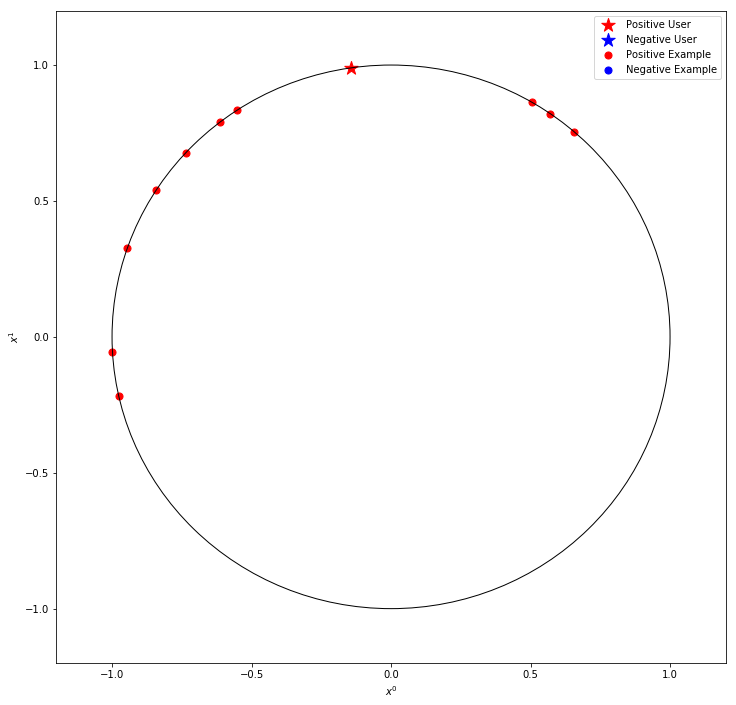

In [11]:
np.random.seed(1221)
user_angle = np.random.uniform(-np.pi, np.pi,2)
pos_angle = np.random.uniform(-np.pi, np.pi,10)
neg_angle = np.random.uniform(-np.pi, np.pi,10)
users = np.array([np.array([np.cos(angle), np.sin(angle)]) for angle in user_angle])
positives = np.array([np.array([np.cos(angle), np.sin(angle)]) for angle in pos_angle])
negatives = np.array([np.array([np.cos(angle), np.sin(angle)]) for angle in neg_angle])
items = [positives, negatives]

for i in range(2):
    for j in range(4):
        users[i] = gradient_descent(
                             users[i], 
                             items[i], 
                             frechet_diff, 
                             geometry="spherical", 
                             learning_rate=0.32,
                             return_vectors=False,
                        )
        
fig = plt.figure(figsize=(12,12))
ax = plt.gca(xlim=[-1.2, 1.2], ylim=[-1.2,1.2], xlabel="$x^0$", ylabel="$x^1$")
circle = patches.Circle((0,0), 1., edgecolor="k", fill=False)
#ax.add_collection(collections.PatchCollection(patch_list))
ax.add_artist(circle)
pos_user = ax.scatter([],[], color='r', marker='*',s=200,label = "Positive User")
neg_user = ax.scatter([],[], color='b', marker='*',s=200,label = "Negative User")
pos_scat = ax.scatter([], [], color='r', marker='.',s=200,label = "Positive Example")
neg_scat = ax.scatter([], [], color='b', marker='.',s=200,label = "Negative Example")
ax.legend()

bg_cache = fig.canvas.copy_from_bbox(ax.bbox)
pos_pts = positives
neg_pts = negatives
def plot_points(num):
    for i, pt in enumerate(pos_pts):
        pos_pts[i] = gradient_descent(
                                             pt, 
                                             users[0], 
                                             error_differential_eucl, 
                                             geometry="spherical", 
                                             learning_rate=0.2
                            )
    pos_scat.set_offsets(pos_pts)
    for j in range(4):
        users[0] = gradient_descent(
                             users[0], 
                             pos_pts, 
                             frechet_diff, 
                             geometry="spherical", 
                             learning_rate=0.2,
                             return_vectors=False,
                        ) 
    pos_user.set_offsets(users[0])
    print('-'*80)
    return pos_scat, pos_user
#    return updated_pts[num]

anim = animation.FuncAnimation(fig,
                               plot_points,
                   #            gradient_descent(
                   #                              updated_pts[i-1], 
                   #                              users[0], 
                   #                              error_differential_eucl, 
                    #                             geometry="spherical", 
                   #                              learning_rate=0.2
                    #            ),
                           #    fargs=[updated_pts],
                               interval=1000,
                               frames=4,
                               blit=False,
                              )
anim.save('circle_many_frechet2.mp4')